## **Pricing**

This dataset provides detailed insights into the pricing of 1GB of mobile data across various regions and countries. It includes average prices in local and USD-equivalent currencies, conversion rates, and detailed pricing data for the cheapest and most expensive packages. The dataset is invaluable for economic research, telecommunications analysis, and global price comparison studies.

The data captures the pricing variability across different continents and regions and provides frozen exchange rates as of July 9, 2023, ensuring consistent comparison. With over 5,600 packages analyzed, the dataset also includes global aggregates such as the average package price worldwide, the most expensive and cheapest 1GB globally, and the total number of countries studied.

In [1]:
import pandas as pd
import openpyxl
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
url="Data pricing.xlsx"
df=pd.read_excel(url)
df

,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Global Totals (2023),Unnamed: 12
0,NEAR EAST,24,0.08,ILS,0.25988,0.02,0.004,0.001,0.83,0.22,24-07-2023,Total number of countries,237.000
1,WESTERN EUROPE,33,0.08,EUR,1.07157,0.09,0.030,0.030,2.00,2.14,25-07-2023,Most expensive 1GB,138.190
2,OCEANIA,17,0.20,FJD,0.44000,0.09,0.100,0.040,1.00,0.44,19-07-2023,Cheapest 1GB,0.001
3,WESTERN EUROPE,12,0.09,EUR,1.07157,0.10,0.040,0.040,2.00,2.14,2023-06-09 00:00:00,Average package price globally,0.460
4,ASIA (EX. NEAR EAST),16,0.12,USD,1.00000,0.12,0.100,0.100,0.20,0.20,2023-01-09 00:00:00,Total packages included in study,5603.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,OCEANIA,6,29.27,NZD,0.58895,17.24,22.220,13.090,40.00,23.56,2023-09-08 00:00:00,NaN,NaN
233,SUB-SAHARAN AFRICA,26,3087.33,SSP,0.00768,23.70,600.000,4.610,18000.00,138.19,2023-08-08 00:00:00,NaN,NaN
234,SUB-SAHARAN AFRICA,4,31.94,SHP,1.25654,40.13,30.900,38.830,41.20,51.77,2023-08-08 00:00:00,NaN,NaN
235,SOUTH AMERICA,4,32.50,FKP,1.24860,40.58,21.670,27.050,60.00,74.92,2023-04-09 00:00:00,NaN,NaN


In [3]:
# Eliminar las columnas Global total y unnamed
df.drop(columns=['Global Totals (2023)'],inplace=True)
df.drop(columns=['Unnamed: 12'],inplace=True)

In [4]:
df.shape

(237, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Continental region                         237 non-null    object 
 1   Plans measured                             237 non-null    int64  
 2   Average price of 1GB (local currency)      237 non-null    float64
 3   Currency                                   237 non-null    object 
 4   Conversion rate (USD) (Frozen 07/09/2023)  237 non-null    float64
 5   Average price of 1GB (USD)                 237 non-null    float64
 6   Cheapest 1GB (Local currency)              237 non-null    float64
 7   Cheapest 1GB for 30 days (USD)             237 non-null    float64
 8   Most expensive 1GB (Local currency)        237 non-null    float64
 9   Most expensive 1GB (USD)                   237 non-null    float64
 10  Sample date               

In [6]:
df['Sample date']=pd.to_datetime(df['Sample date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Continental region                         237 non-null    object        
 1   Plans measured                             237 non-null    int64         
 2   Average price of 1GB (local currency)      237 non-null    float64       
 3   Currency                                   237 non-null    object        
 4   Conversion rate (USD) (Frozen 07/09/2023)  237 non-null    float64       
 5   Average price of 1GB (USD)                 237 non-null    float64       
 6   Cheapest 1GB (Local currency)              237 non-null    float64       
 7   Cheapest 1GB for 30 days (USD)             237 non-null    float64       
 8   Most expensive 1GB (Local currency)        237 non-null    float64       
 9   Most expensive 1GB (U

In [7]:
df.head()

,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 07/09/2023),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
0,NEAR EAST,24,0.08,ILS,0.25988,0.02,0.004,0.001,0.83,0.22,2023-07-24
1,WESTERN EUROPE,33,0.08,EUR,1.07157,0.09,0.030,0.030,2.00,2.14,2023-07-25
2,OCEANIA,17,0.20,FJD,0.44000,0.09,0.100,0.040,1.00,0.44,2023-07-19
3,WESTERN EUROPE,12,0.09,EUR,1.07157,0.10,0.040,0.040,2.00,2.14,2023-06-09
4,ASIA (EX. NEAR EAST),16,0.12,USD,1.00000,0.12,0.100,0.100,0.20,0.20,2023-01-09


In [8]:
df['year'] = df['Sample date'].dt.year
df['month'] = df['Sample date'].dt.month

## **EDA**

In [9]:
# Datos categoricos
cat=df.select_dtypes(include='object').columns
for i in cat:
    print(df[i].value_counts())
    print('--------------------')

Continental region
SUB-SAHARAN AFRICA      50
WESTERN EUROPE          29
CARIBBEAN               29
ASIA (EX. NEAR EAST)    28
OCEANIA                 24
NEAR EAST               15
EASTERN EUROPE          15
SOUTH AMERICA           14
CIS                     11
CENTRAL AMERICA          8
NORTHERN AFRICA          7
NORTHERN AMERICA         4
BALTICS                  3
Name: count, dtype: int64
--------------------
Currency
EUR    36
USD    21
XOF    10
XCD     9
AUD     6
       ..
SGD     1
KES     1
PHP     1
RSD     1
FKP     1
Name: count, Length: 143, dtype: int64
--------------------


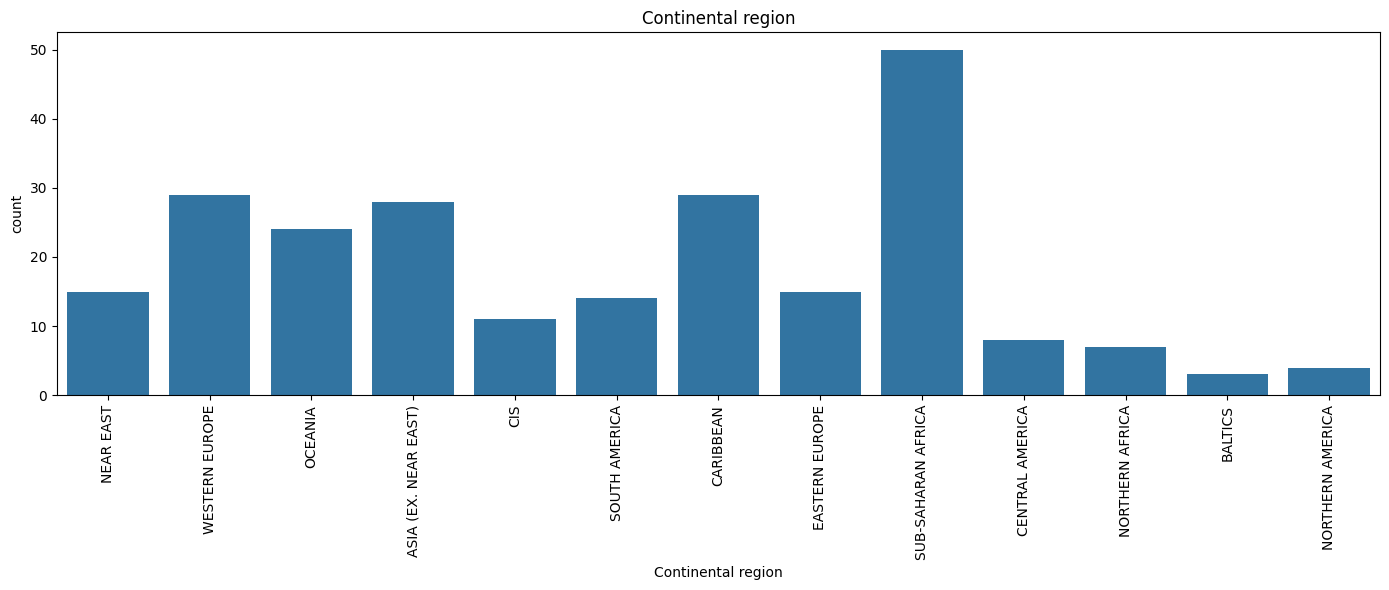

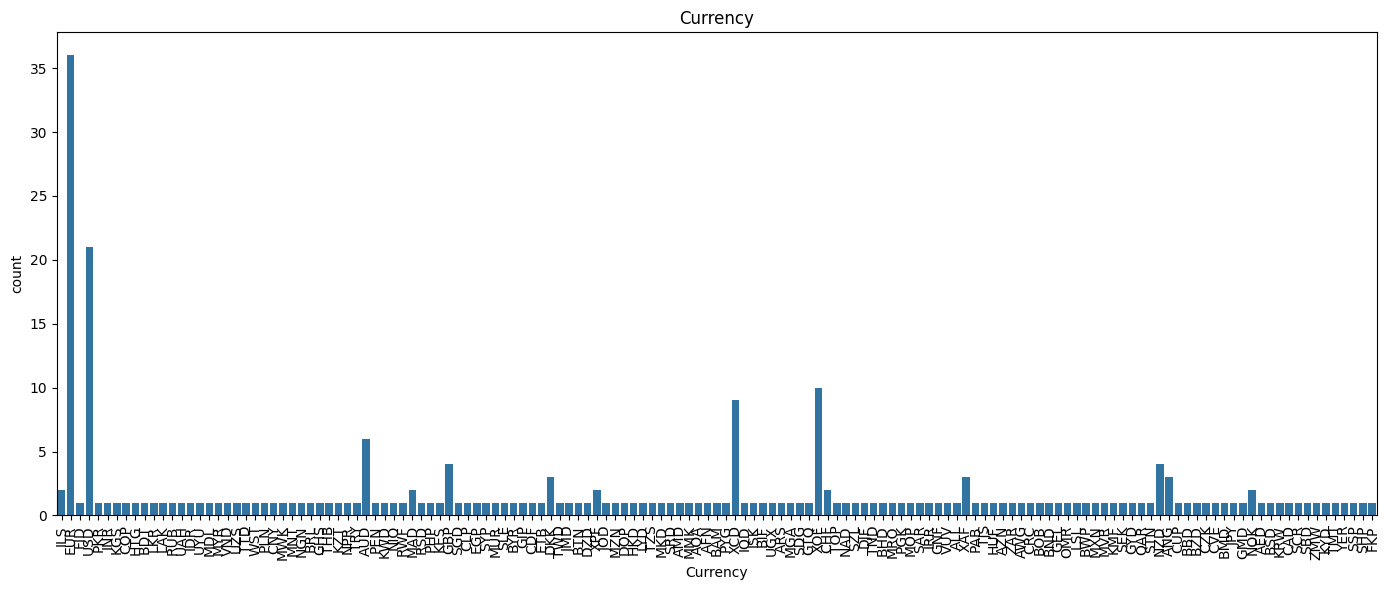

In [10]:
for i in cat:
    plt.figure(figsize=(14,6))
    sns.countplot(data=df,x=i)
    plt.title(i,fontsize=12)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()

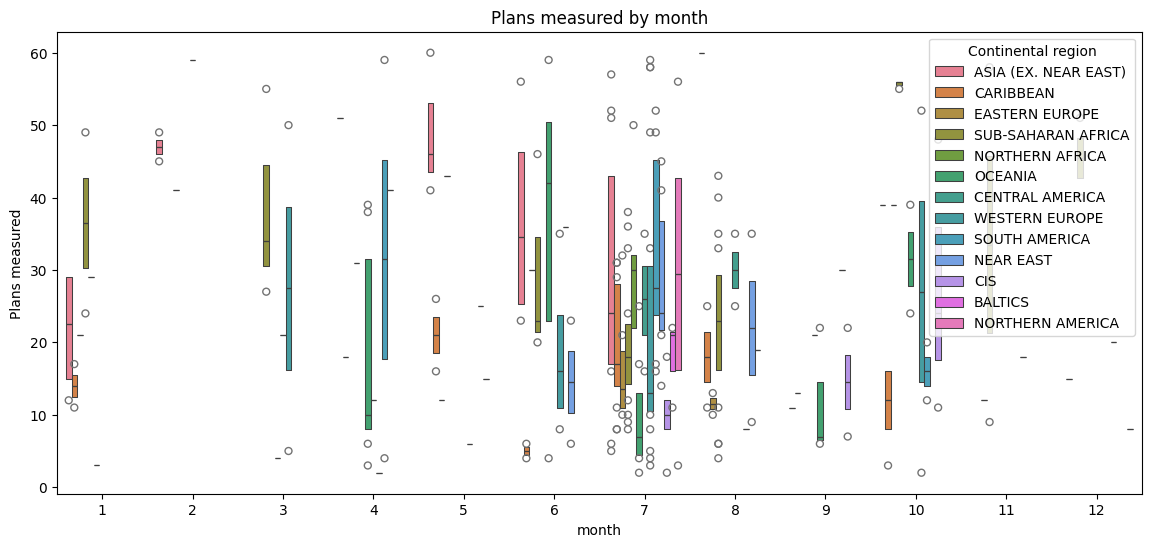

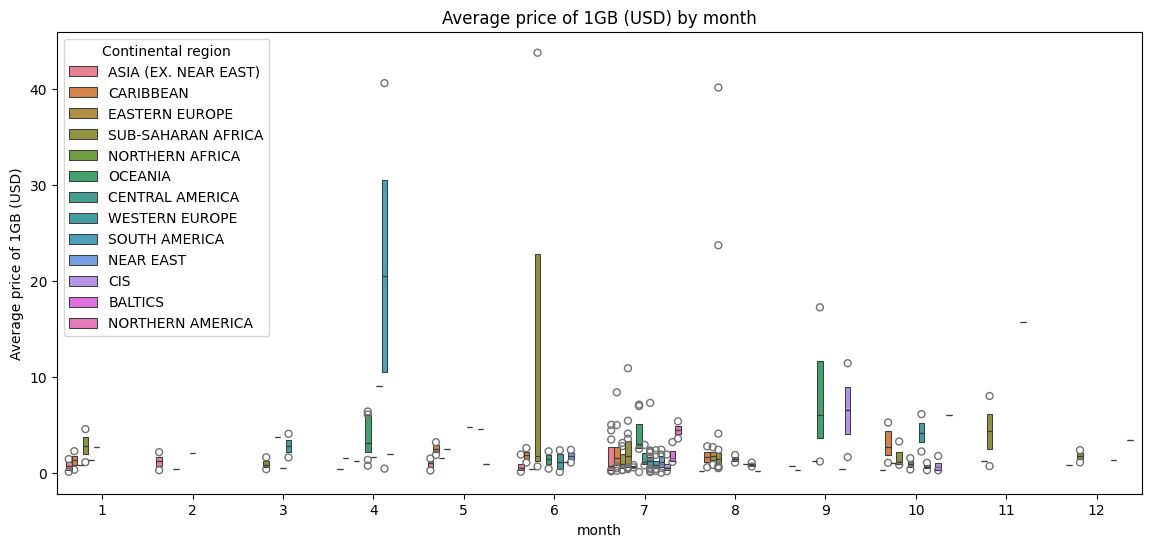

In [24]:
plt.figure(figsize=(14,6))
sns.boxenplot(data=df,y='Plans measured',x='month',hue='Continental region')
plt.title('Plans measured by month')
plt.show()


plt.figure(figsize=(14,6))
sns.boxenplot(data=df,y='Average price of 1GB (USD)',x='month',hue='Continental region')
plt.title('Average price of 1GB (USD) by month')
plt.show()

In [25]:
# Gráfica de cajas para 'Plans measured'
fig1 = px.box(df, x="month", y="Plans measured", color="Continental region", 
               title="Plans measured by month")
fig1.show()

# Gráfica de cajas para 'Average price of 1GB (local currency)'
fig2 = px.box(df, x="month", y="Average price of 1GB (USD)", color="Continental region", 
               title="Average price of 1GB by month")
fig2.show()

**Average price of 1GB (USD)**

In [99]:
#df_region = df.loc[df['Currency'] == 'EUR', ['Continental region', 'Average price of 1GB (USD)','year', 'month']]
df_region = df[['Continental region', 'Average price of 1GB (USD)','year', 'month']]
df_region_max=df_region.groupby('Continental region')['Average price of 1GB (USD)'].max()
df_region_min=df_region.groupby('Continental region')['Average price of 1GB (USD)'].min()

In [100]:
df_region_max = pd.DataFrame(df_region_max)
df_region_min = pd.DataFrame(df_region_min)

# Asignar el resultado del método rename() de nuevo al DataFrame original
df_region_max = df_region_max.rename(columns={'Average price of 1GB (USD)': 'Max price'})
df_region_min = df_region_min.rename(columns={'Average price of 1GB (USD)': 'Min price'})

df_region_max.reset_index(inplace=True)
df_region_min.reset_index(inplace=True)

print(df_region_max.shape)
print(df_region_min.shape)

df_inner_join = pd.merge(df_region_min, df_region_max, on=['Continental region'], how='inner')
df_inner_join.head()

(13, 2)
(13, 2)


,Continental region,Min price,Max price
0,ASIA (EX. NEAR EAST),0.12,5.01
1,BALTICS,1.15,3.21
2,CARIBBEAN,0.22,8.39
3,CENTRAL AMERICA,0.55,2.92
4,CIS,0.17,11.42


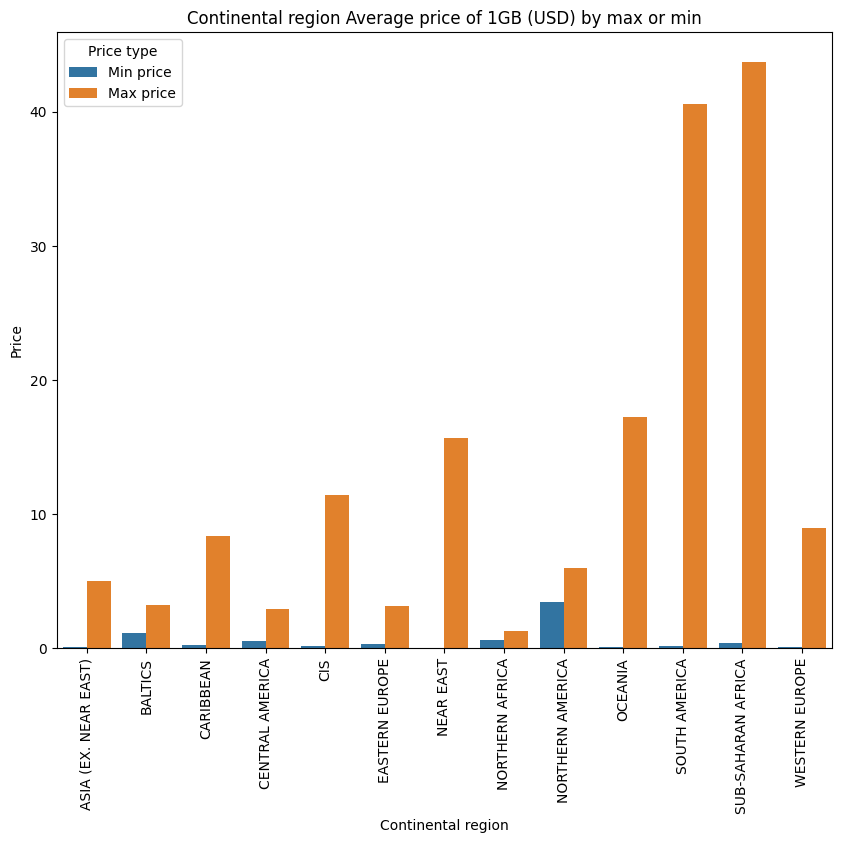

In [104]:
# Reorganizar el DataFrame para que tenga una columna para el precio y otra para el tipo de precio
df_inner_join_melt = pd.melt(df_inner_join, id_vars=['Continental region'], value_vars=['Min price', 'Max price'], var_name='Price type', value_name='Price')

# Graficar el gráfico de barras
plt.figure(figsize=(10,8))
sns.barplot(data=df_inner_join_melt, x='Continental region', y='Price', hue='Price type')
plt.title('Continental region Average price of 1GB (USD) by max or min')
plt.xticks(rotation='vertical')
plt.show()

In [103]:
fig=px.bar(df_inner_join_melt,x='Continental region', y='Price', color='Price type',
           title='Continental region Average price of 1GB (USD) by max or min')
fig.show()

* En las regiones de south america y sub saharab africa tienen el mayor consumo de Average price of 1GB (USD)

**Cheapest 1GB for 30 days (USD)**

(13, 2)
(13, 2)


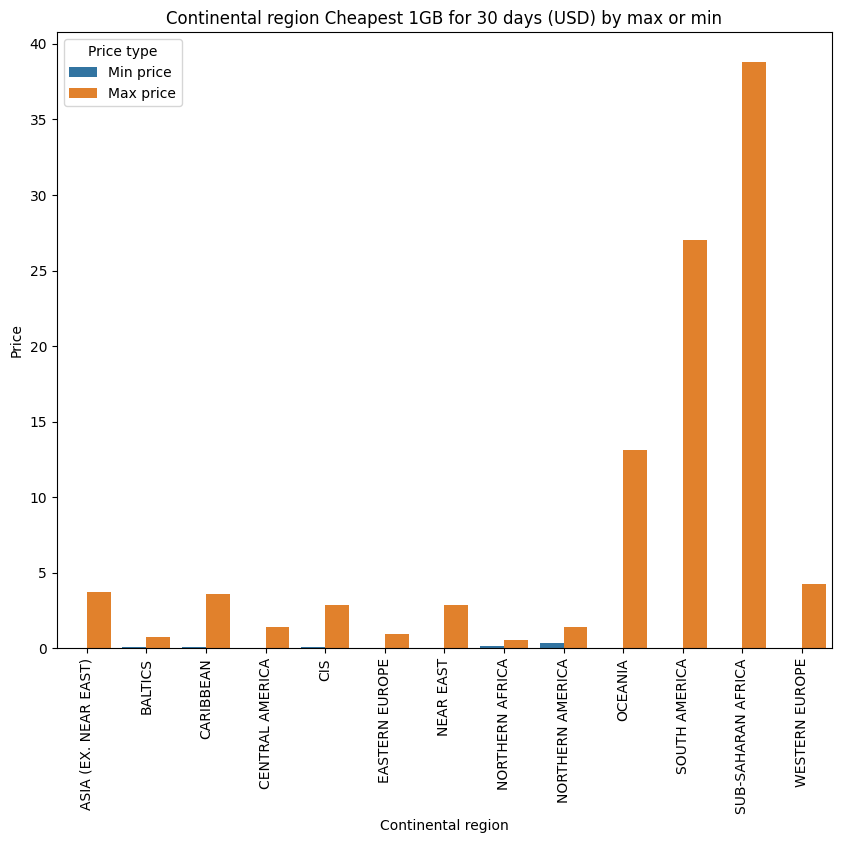

In [109]:
df_region = df[['Continental region', 'Cheapest 1GB for 30 days (USD)','year', 'month']]
df_region_Cheapest_max=df_region.groupby('Continental region')['Cheapest 1GB for 30 days (USD)'].max()
df_region_Cheapest_min=df_region.groupby('Continental region')['Cheapest 1GB for 30 days (USD)'].min()
df_region_Cheapest_max = pd.DataFrame(df_region_Cheapest_max)
df_region_Cheapest_min = pd.DataFrame(df_region_Cheapest_min)

# Asignar el resultado del método rename() de nuevo al DataFrame original
df_region_Cheapest_max = df_region_Cheapest_max.rename(columns={'Cheapest 1GB for 30 days (USD)': 'Max price'})
df_region_Cheapest_min = df_region_Cheapest_min.rename(columns={'Cheapest 1GB for 30 days (USD)': 'Min price'})

df_region_Cheapest_max.reset_index(inplace=True)
df_region_Cheapest_min.reset_index(inplace=True)

print(df_region_Cheapest_max.shape)
print(df_region_Cheapest_min.shape)

df_inner_Cheapest_join = pd.merge(df_region_Cheapest_min, df_region_Cheapest_max, on=['Continental region'], how='inner')
# Reorganizar el DataFrame para que tenga una columna para el precio y otra para el tipo de precio
df_inner_Cheapest_join_melt = pd.melt(df_inner_Cheapest_join, id_vars=['Continental region'], value_vars=['Min price', 'Max price'], var_name='Price type', value_name='Price')

# Graficar el gráfico de barras
plt.figure(figsize=(10,8))
sns.barplot(data=df_inner_Cheapest_join_melt, x='Continental region', y='Price', hue='Price type')
plt.title('Continental region Cheapest 1GB for 30 days (USD) by max or min')
plt.xticks(rotation='vertical')
plt.show()

**Most expensive 1GB (USD)**

(13, 2)
(13, 2)


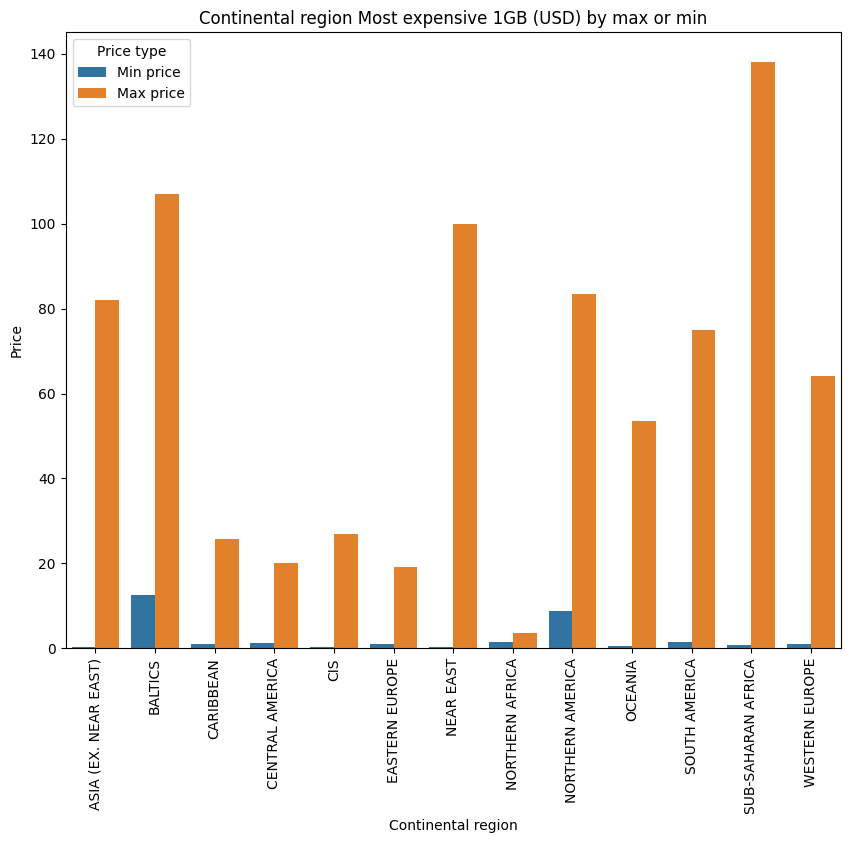

In [111]:
df_region = df[['Continental region', 'Most expensive 1GB (USD)','year', 'month']]
df_region_expensive_max=df_region.groupby('Continental region')['Most expensive 1GB (USD)'].max()
df_region_expensive_min=df_region.groupby('Continental region')['Most expensive 1GB (USD)'].min()
df_region_expensive_max = pd.DataFrame(df_region_expensive_max)
df_region_expensive_min = pd.DataFrame(df_region_expensive_min)

# Asignar el resultado del método rename() de nuevo al DataFrame original
df_region_expensive_max = df_region_expensive_max.rename(columns={'Most expensive 1GB (USD)': 'Max price'})
df_region_expensive_min = df_region_expensive_min.rename(columns={'Most expensive 1GB (USD)': 'Min price'})

df_region_expensive_max.reset_index(inplace=True)
df_region_expensive_min.reset_index(inplace=True)

print(df_region_expensive_max.shape)
print(df_region_expensive_min.shape)

df_inner_expensive_join = pd.merge(df_region_expensive_min, df_region_expensive_max, on=['Continental region'], how='inner')
# Reorganizar el DataFrame para que tenga una columna para el precio y otra para el tipo de precio
df_inner_expensive_join_melt = pd.melt(df_inner_expensive_join, id_vars=['Continental region'], value_vars=['Min price', 'Max price'], var_name='Price type', value_name='Price')

# Graficar el gráfico de barras
plt.figure(figsize=(10,8))
sns.barplot(data=df_inner_expensive_join_melt, x='Continental region', y='Price', hue='Price type')
plt.title('Continental region Most expensive 1GB (USD) by max or min')
plt.xticks(rotation='vertical')
plt.show()

In [116]:
df_region_usd=df[['Average price of 1GB (USD)','Cheapest 1GB for 30 days (USD)','Most expensive 1GB (USD)']]
df_region_usd.describe()

,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD)
count,237.000000,237.000000,237.000000
mean,2.589198,1.026143,13.974304
std,5.179471,3.236073,19.916485
min,0.020000,0.001000,0.200000
25%,0.630000,0.160000,2.890000
50%,1.280000,0.370000,6.900000
75%,2.500000,0.900000,16.070000
max,43.750000,38.830000,138.190000


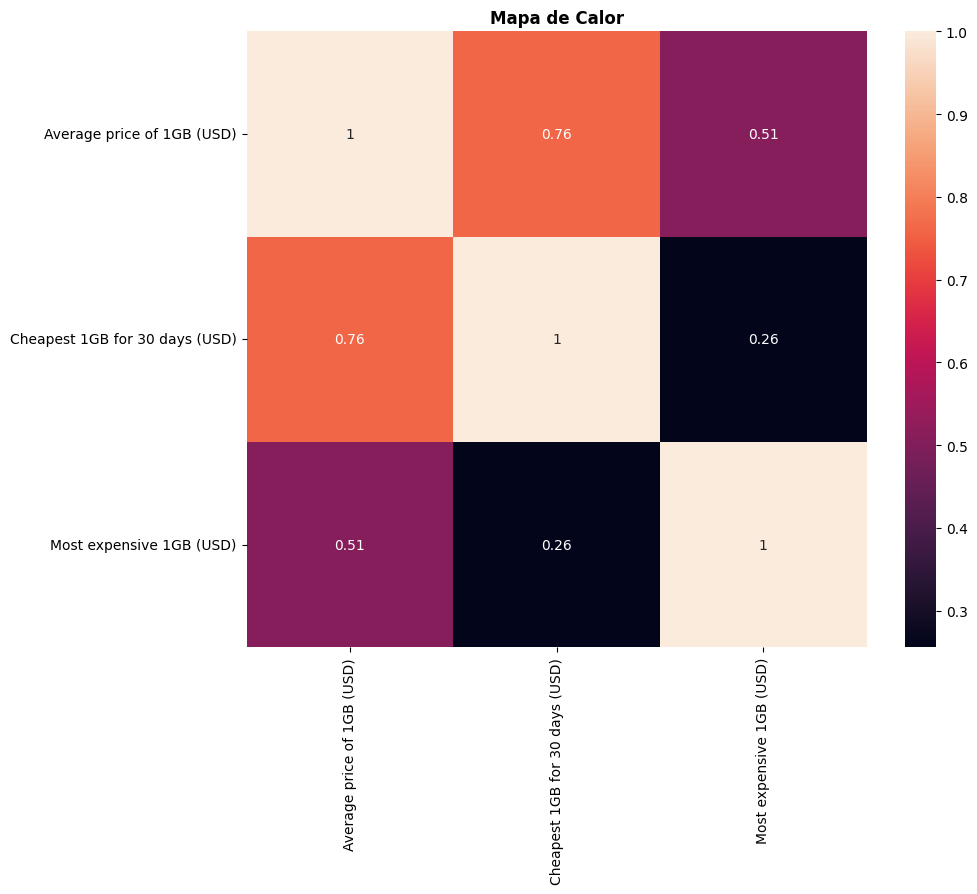

In [120]:
plt.figure(figsize=(10,8))
sns.heatmap(df_region_usd.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()